In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)


# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.

inspector = inspect(engine)

meas_columns = inspector.get_columns('measurement')
print("Measurement")
for c in meas_columns:
    print(c['name'], c["type"])
    
station_columns = inspector.get_columns('station')
print("\nStations")
for c in station_columns:
    print(c['name'], c["type"])

Measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

Stations
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [72]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

lastdate = session.query(func.max(Measurement.date)).\
            scalar()

dt_lastdate= dt.datetime.strptime(lastdate,"%Y-%m-%d").date()
dt_startdate = dt_lastdate - dt.timedelta(days=365)
startdate = dt_startdate.strftime("%Y-%m-%d")

query = session.query(Measurement).\
            filter(Measurement.date.between(startdate,lastdate)).\
            all()

# Perform a query to retrieve the data and precipitation scores

dates = []
precip = []
for row in query:
    measurement = row
    dates.append(measurement.date)
    precip.append(measurement.prcp)

In [73]:
# Save the query results as a Pandas DataFrame and set the index to the date column

measurement = pd.DataFrame({"date":dates,
                             "precipitation":precip})
measurement.dropna(inplace = True)
measurement

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2223,2017-08-17,0.13
2225,2017-08-19,0.09
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [76]:
# Sort the dataframe by date

prcp_df = pd.DataFrame(prcp_data,columns=['date','precipitation'])
prcp_df.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


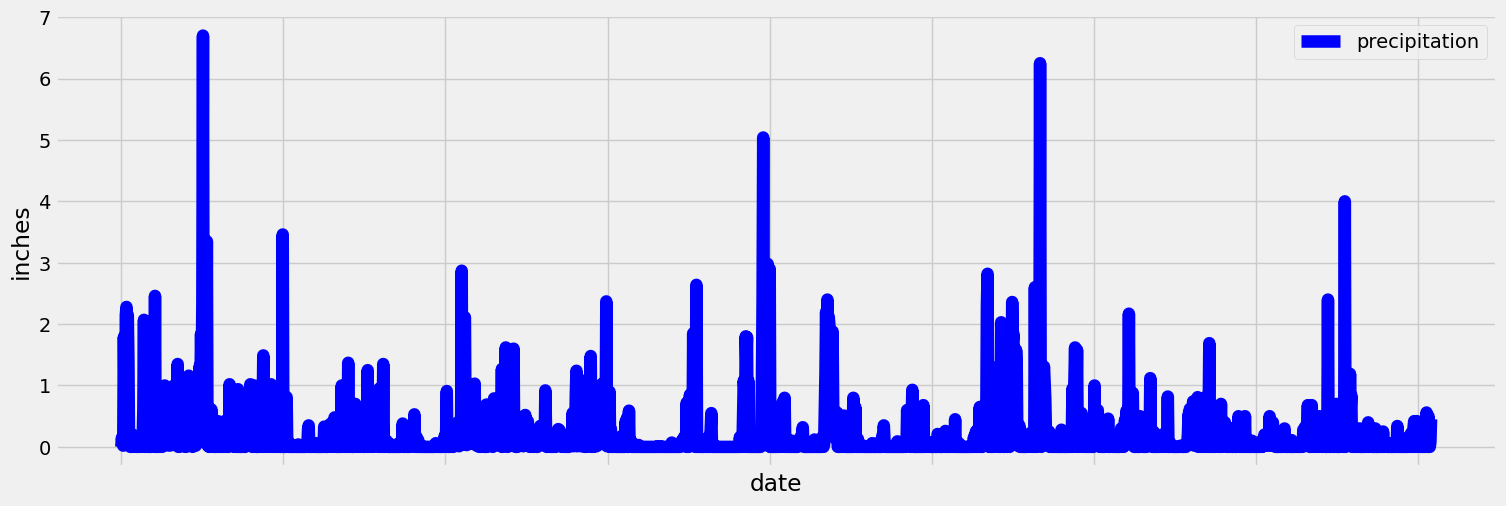

In [77]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.set_index('date',inplace=True)
prcp_df = prcp_df.sort_index()

ax=df_results.plot(color='b',figsize=(15,5),legend=True,linewidth=9.0,grid=True);

plt.setp(ax.get_xticklabels(), visible=False)
plt.tight_layout()
plt.xlabel("date")
plt.ylabel("inches")
plt.show()

In [78]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [84]:
# Design a query to calculate the total number stations in the dataset

total_stations = session.query(func.count(func.distinct(Measurement.station))).first()[0]
total_stations


9

In [85]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.id))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.id).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [87]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

results_temp=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
             filter(Measurement.station==active_stations[0][0]).all()
results_temp

[(54.0, 85.0, 71.66378066378067)]

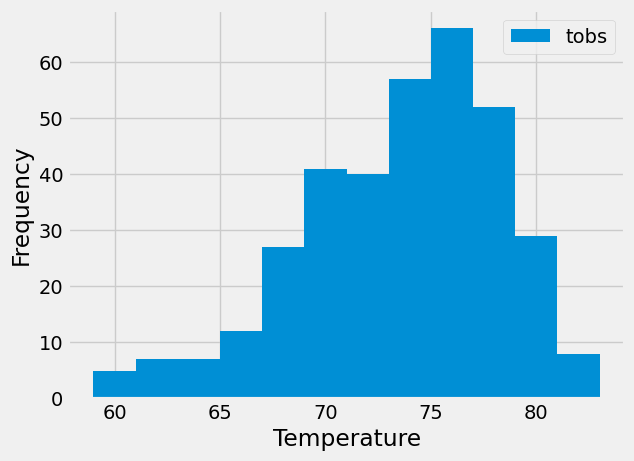

In [101]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results_data =  session.query(Measurement.date,Measurement.tobs).\
                    filter(Measurement.station == 'USC00519281').\
                    filter(Measurement.date > last_year_date).all()

results_df= pd.DataFrame(USC00519281_data)
results_df.plot(kind="hist",bins=12);

plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [102]:
# Close Session
session.close()